# Declaration of Originality

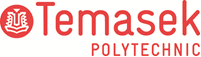

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* <bl>Student Name (Matric Number) </bl> : Cai Jiale (2403847C)
* Tutorial Group                : PC01
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [ ]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly

# 1. Business Understanding

**1.Problem Background & Motivation:** 

The real estate market in Ames, Iowa, faces a lack of accessible, data-driven tools to help users make confident pricing decisions. Buyers often risk overpaying due to emotional bidding or misinformation. Sellers may undervalue their properties or face long listing times due to unrealistic pricing. Real estate agents need fast, consistent estimations to serve clients efficiently. Meanwhile, market participants, including investors, lack transparency into the key factors that affect property prices.


**2.Goal:** 
- Provide a streamlined, accurate price prediction tool that makes housing price insights more accessible to non-technical users.
- Enable interactive feature selection and simulation, so users can explore how different property characteristics (e.g., area, quality, basement size) influence the final price.
- Improve pricing strategy accuracy for sellers and agents to reduce time-on-market and negotiation disputes.
- Empower buyers to make better-informed investment decisions or first-home purchases based on predicted price fairness.

**3.Stakeholders:**
- Home buyers (mainstream users)
- Real estate agents (consultative users)
- Sellers & investors (financial decision-makers)
- Market analysts & urban planners (secondary/extended users)

**4.Business Success Criteria：**
- Users can predict house prices with <15% deviation from actual market sale prices.
- Stakeholders use the tool to validate or adjust pricing decisions in at least 80% of test scenarios.
- Streamlit app receives positive user feedback on clarity, usefulness, and relevance during UAT (User Acceptance Testing).
- The model ranks key influencing factors clearly (e.g., quality, size), supporting educational and business communication purposes.

**5.Constraints and Considerations**
- Model needs to work with limited features during deployment (not all users know MSSubClass or GarageFinish).
- Predictions should remain interpretable, avoiding black-box overfitting, especially for educational or advisory use.
- Deployment limitations: The Streamlit app must remain lightweight, responsive, and accessible on most devices.
- The primary goal of this project is to accurately predict house sale prices in Ames, Iowa, using a real-world dataset of property characteristics. This model is implemented into a user-friendly Streamlit web app, where stakeholders can interactively filter features (e.g., house size, neighborhood, garage type) and instantly receive a price prediction. This allows:

# 2. Data Understanding

## 2.1 Load dataset

In [ ]:
# Load train and test data
FILEPATH = pd.read_csv("train.csv")
df = FILEPATH
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## 2.2 Summary Statistics

In [ ]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

I used df.info() to quickly understand the overall structure of the dataset, including the number of entries (rows), number of features (columns), data types, and presence of missing values.

From the output, I observed that the dataset contains 1460 rows and 81 features. Some features, like ‘Alley’, have a large number of missing values (only 91 non-null entries), which means I may need to either fill or drop them depending on their importance.

Understanding the data types helps me decide how to handle each feature properly — for instance, I know that object-type features are likely to be categorical and may require encoding (like One-Hot Encoding) before modeling.

This step also helps me plan my data preprocessing, such as handling missing values, deciding which columns to transform, and choosing the right type of visualizations (e.g., bar chart for categorical features, histograms for numerical ones).

In short, df.info() gives me a foundation to clean and prepare my data effectively, and ensures I don’t go into modeling blindly without knowing the shape and quality of my data.

In [ ]:
## Describe data distribution
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


I used the method df.describe(include='all') to conduct a comprehensive descriptive statistical analysis of the dataset. This method can provide summary statistics for numerical variables, frequency-related information for categorical variables, and is helpful in identifying distribution patterns, skewness, outliers, missing values, and variable types. The analysis results provided guidance for subsequent preprocessing decisions, including feature encoding, transformation, and feature selection operations. 

For instance, LotArea (land parcel area) shows a wide range and a high standard deviation, indicating an extremely uneven distribution with extreme outliers. To better understand its impact, we used visualization tools such as histograms and box plots, and considered transformation methods such as logarithmic scaling or outlier handling to reduce potential model bias. In contrast, Street (street type) has only two categories, with "Pave" (paved) dominating, suggesting a very low information gain and limited contribution to the predictive performance. Similarly, the bar chart analysis of categorical features such as MSZoning (zone classification) also confirmed that most properties are located in the RL (low-density residential) area, indicating that this dataset mainly represents mainstream low-density residential houses.

      Column  Missing_Count
      PoolQC           1453
 MiscFeature           1406
       Alley           1369
       Fence           1179
  MasVnrType            872
 FireplaceQu            690
 LotFrontage            259
  GarageType             81
 GarageYrBlt             81
GarageFinish             81
  GarageQual             81
  GarageCond             81
BsmtFinType2             38
BsmtExposure             38
BsmtFinType1             37
    BsmtCond             37
    BsmtQual             37
  MasVnrArea              8
  Electrical              1


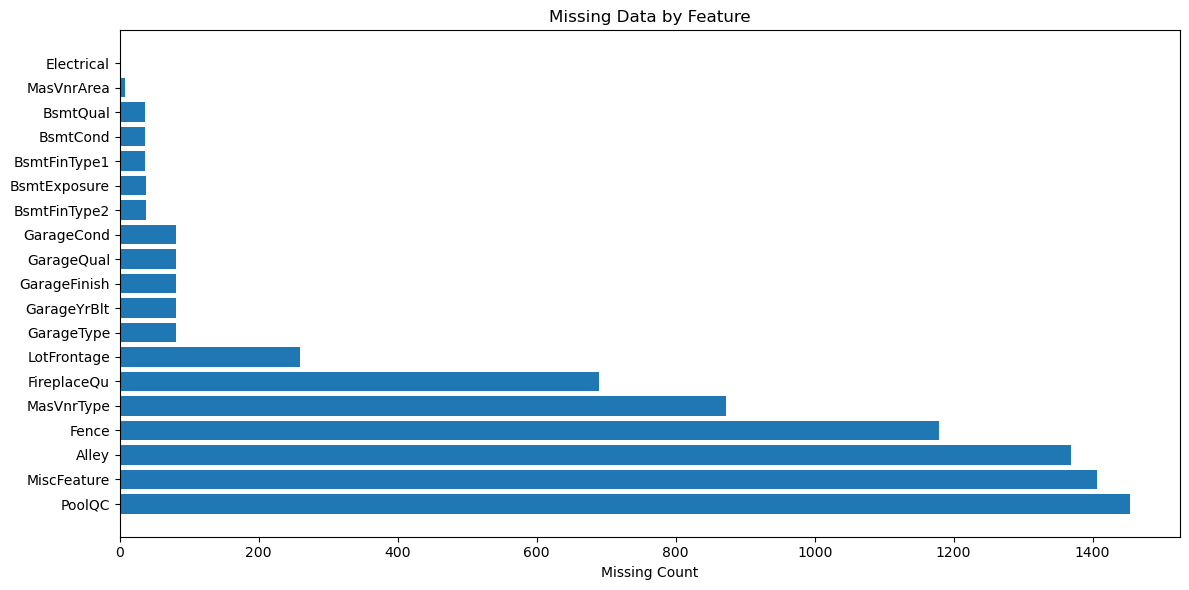

In [ ]:
# Check for missing data
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum()
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_data.to_string(index=False))

plt.figure(figsize=(12, 6))
plt.barh(missing_data['Column'], missing_data['Missing_Count'])
plt.xlabel('Missing Count')
plt.title('Missing Data by Feature')
plt.tight_layout()
plt.show()

In [ ]:
# Feature types which are numerical and categorical
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

#I excluded the Id column (which is just an identifier) and SalePrice (target variable) from the feature list to avoid data leakage.
numerical_features = [f for f in num_cols if f not in ['Id', 'SalePrice']]

feature_df = pd.DataFrame({
    'Numerical Features': pd.Series(numerical_features),
    'Categorical Features': pd.Series(cat_cols)
})

feature_df

,Numerical Features,Categorical Features
0,MSSubClass,MSZoning
1,LotFrontage,Street
2,LotArea,Alley
3,OverallQual,LotShape
4,OverallCond,LandContour
5,YearBuilt,Utilities
6,YearRemodAdd,LotConfig
7,MasVnrArea,LandSlope
8,BsmtFinSF1,Neighborhood
9,BsmtFinSF2,Condition1


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

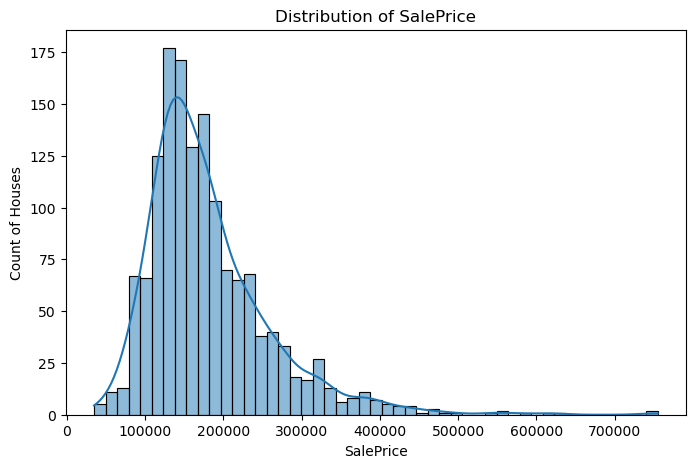

In [ ]:
## Understanding distribution of target
plt.figure(figsize=(8,5))
sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Count of Houses")
plt.show()

Text(0.5, 1.0, 'Box Plot of SalePrice')

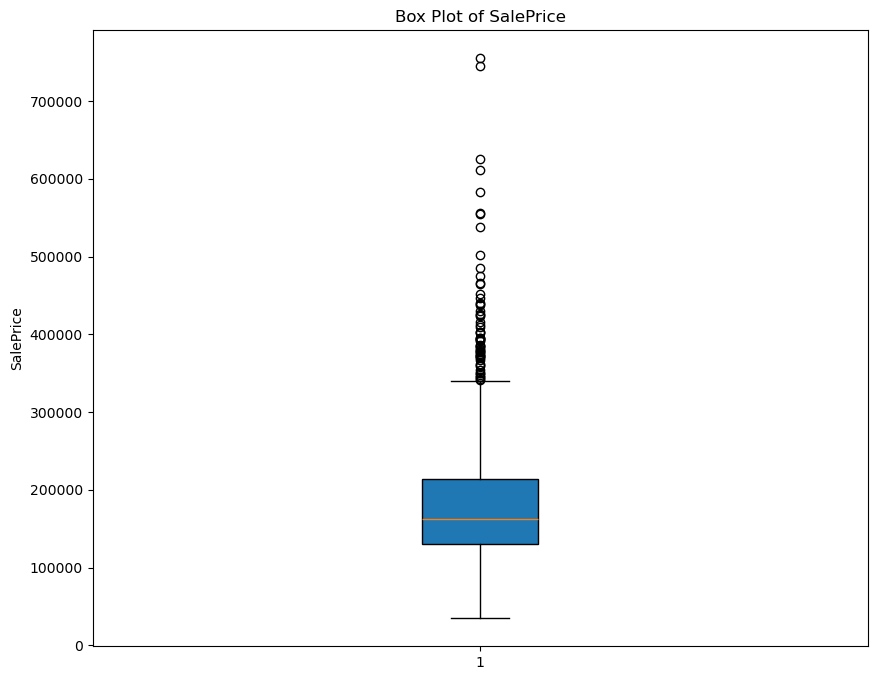

In [ ]:
target_col = 'SalePrice' 

fig, axes = plt.subplots(figsize=(10, 8))
axes.boxplot(df[target_col], vert=True, patch_artist=True)
axes.set_ylabel(target_col)
axes.set_title(f'Box Plot of SalePrice')

1. **mean=$180,921.20 VS median=$163,000**
    - The fact that the mean is significantly higher than the median confirms the distribution’s positive skewness (right-skewed).
    - This skew is primarily caused by a small number of extremely expensive homes—luxury properties or custom-built estates—pulling the average upward.
    - Example: In a neighborhood of 10 homes, if 9 are priced around $150,000 and 1 is $750,000, the average becomes distorted, even though the majority remain mid-priced.

2. **Mode ≈ $150,000 (from histogram peak)**
    - The most frequent house price lies closer to $150k, showing that most buyers transact in this mid-range bracket, well below the mean.

3. **std：79,442.50**
    - A high standard deviation (~44% of the mean) indicates wide variability in home prices, further validating a heterogeneous market.
    - Homes priced above $214k form the upper quartile, possibly representing upgrade purchases, “dream homes,” or higher-end segments.

4. **$IQR = Q3 - Q1 = \$84,025$**
    - This means that the most crucial 50% of the transactions in Ames City are concentrated within the range of $130,000 to $214,000. 
    - This range captures the middle 50% of home prices, meaning most typical transactions lie between $130k and $214k.
    - The dividing line between new construction and improvement: Houses priced above $214,000 account for only 25%, which can be defined as the "improved" or "high-end" housing market in this city.

- The **SalePrice target** contains 1460 valid entries with no missing values. This ensures that the observed distribution is indeed **right-skewed (Positive Skew)** rather than distorted due to incomplete data.

- The prices of most of the houses in the picture are concentrated in the range of $100k - $200k, which indicates that the residents in Ames predominantly middle-income households. Therefore, the As a result, property developers tend to focus on constructing mid-to-loe-priced residences that cater to the mainstream population, as this price range is generally sufficient to meet the basic housing needs of most families. And, only small group of wealthy individuals can afford high-end properties. 

- This pattern can also be explained by the urban and economic context of the dataset. The data originates from Ames, Iowa, a medium-sized city where demand for high-end or luxury housing is naturally limited. Most households in the city belong to the middle-income bracket, which results in a relatively narrow market for expensive properties. Furthermore, the dataset primarily consists of typical residential homes, with fewer investment-oriented or luxury properties included, reinforcing the dense clustering in the affordable price range.

- At 2010 (when the dataset is collected), Amesn may possess a large amount of undeveloped plain land as only when the land supply is abundant will developers build a large number of mid-to-low priced detached houses. if the land is scarce, the price distribution will shift to the right as a whole, and the median will be closer to the mean.

- The existence of the minimum value of $34,900$ implies a clear age gap in the housing market. Such extremely low prices are usually not "cheap houses", but rather "houses in need of renovation" or "dilapidated houses with only land value". This reflects that Ames, as a mature city, has a considerable proportion of old communities, which contrasts sharply with the newly developed high-priced areas (Outliers).

- Outliers don’t invalidate the model, but highlight the need for careful preprocessing and possibly segmented modeling if luxury pricing is analyzed separately. The fact that no lower outliers exist (very few below $35k) suggests no data entry errors on the lower end. The min value of $34,900 likely represents dilapidated properties, houses sold primarily for land, or aging structures requiring full renovation. This may show that Ames likely includes older neighborhoods or aging communities, consistent with its identity as a mature Midwestern city.

### 2.3.1.2 Understanding distribution of features

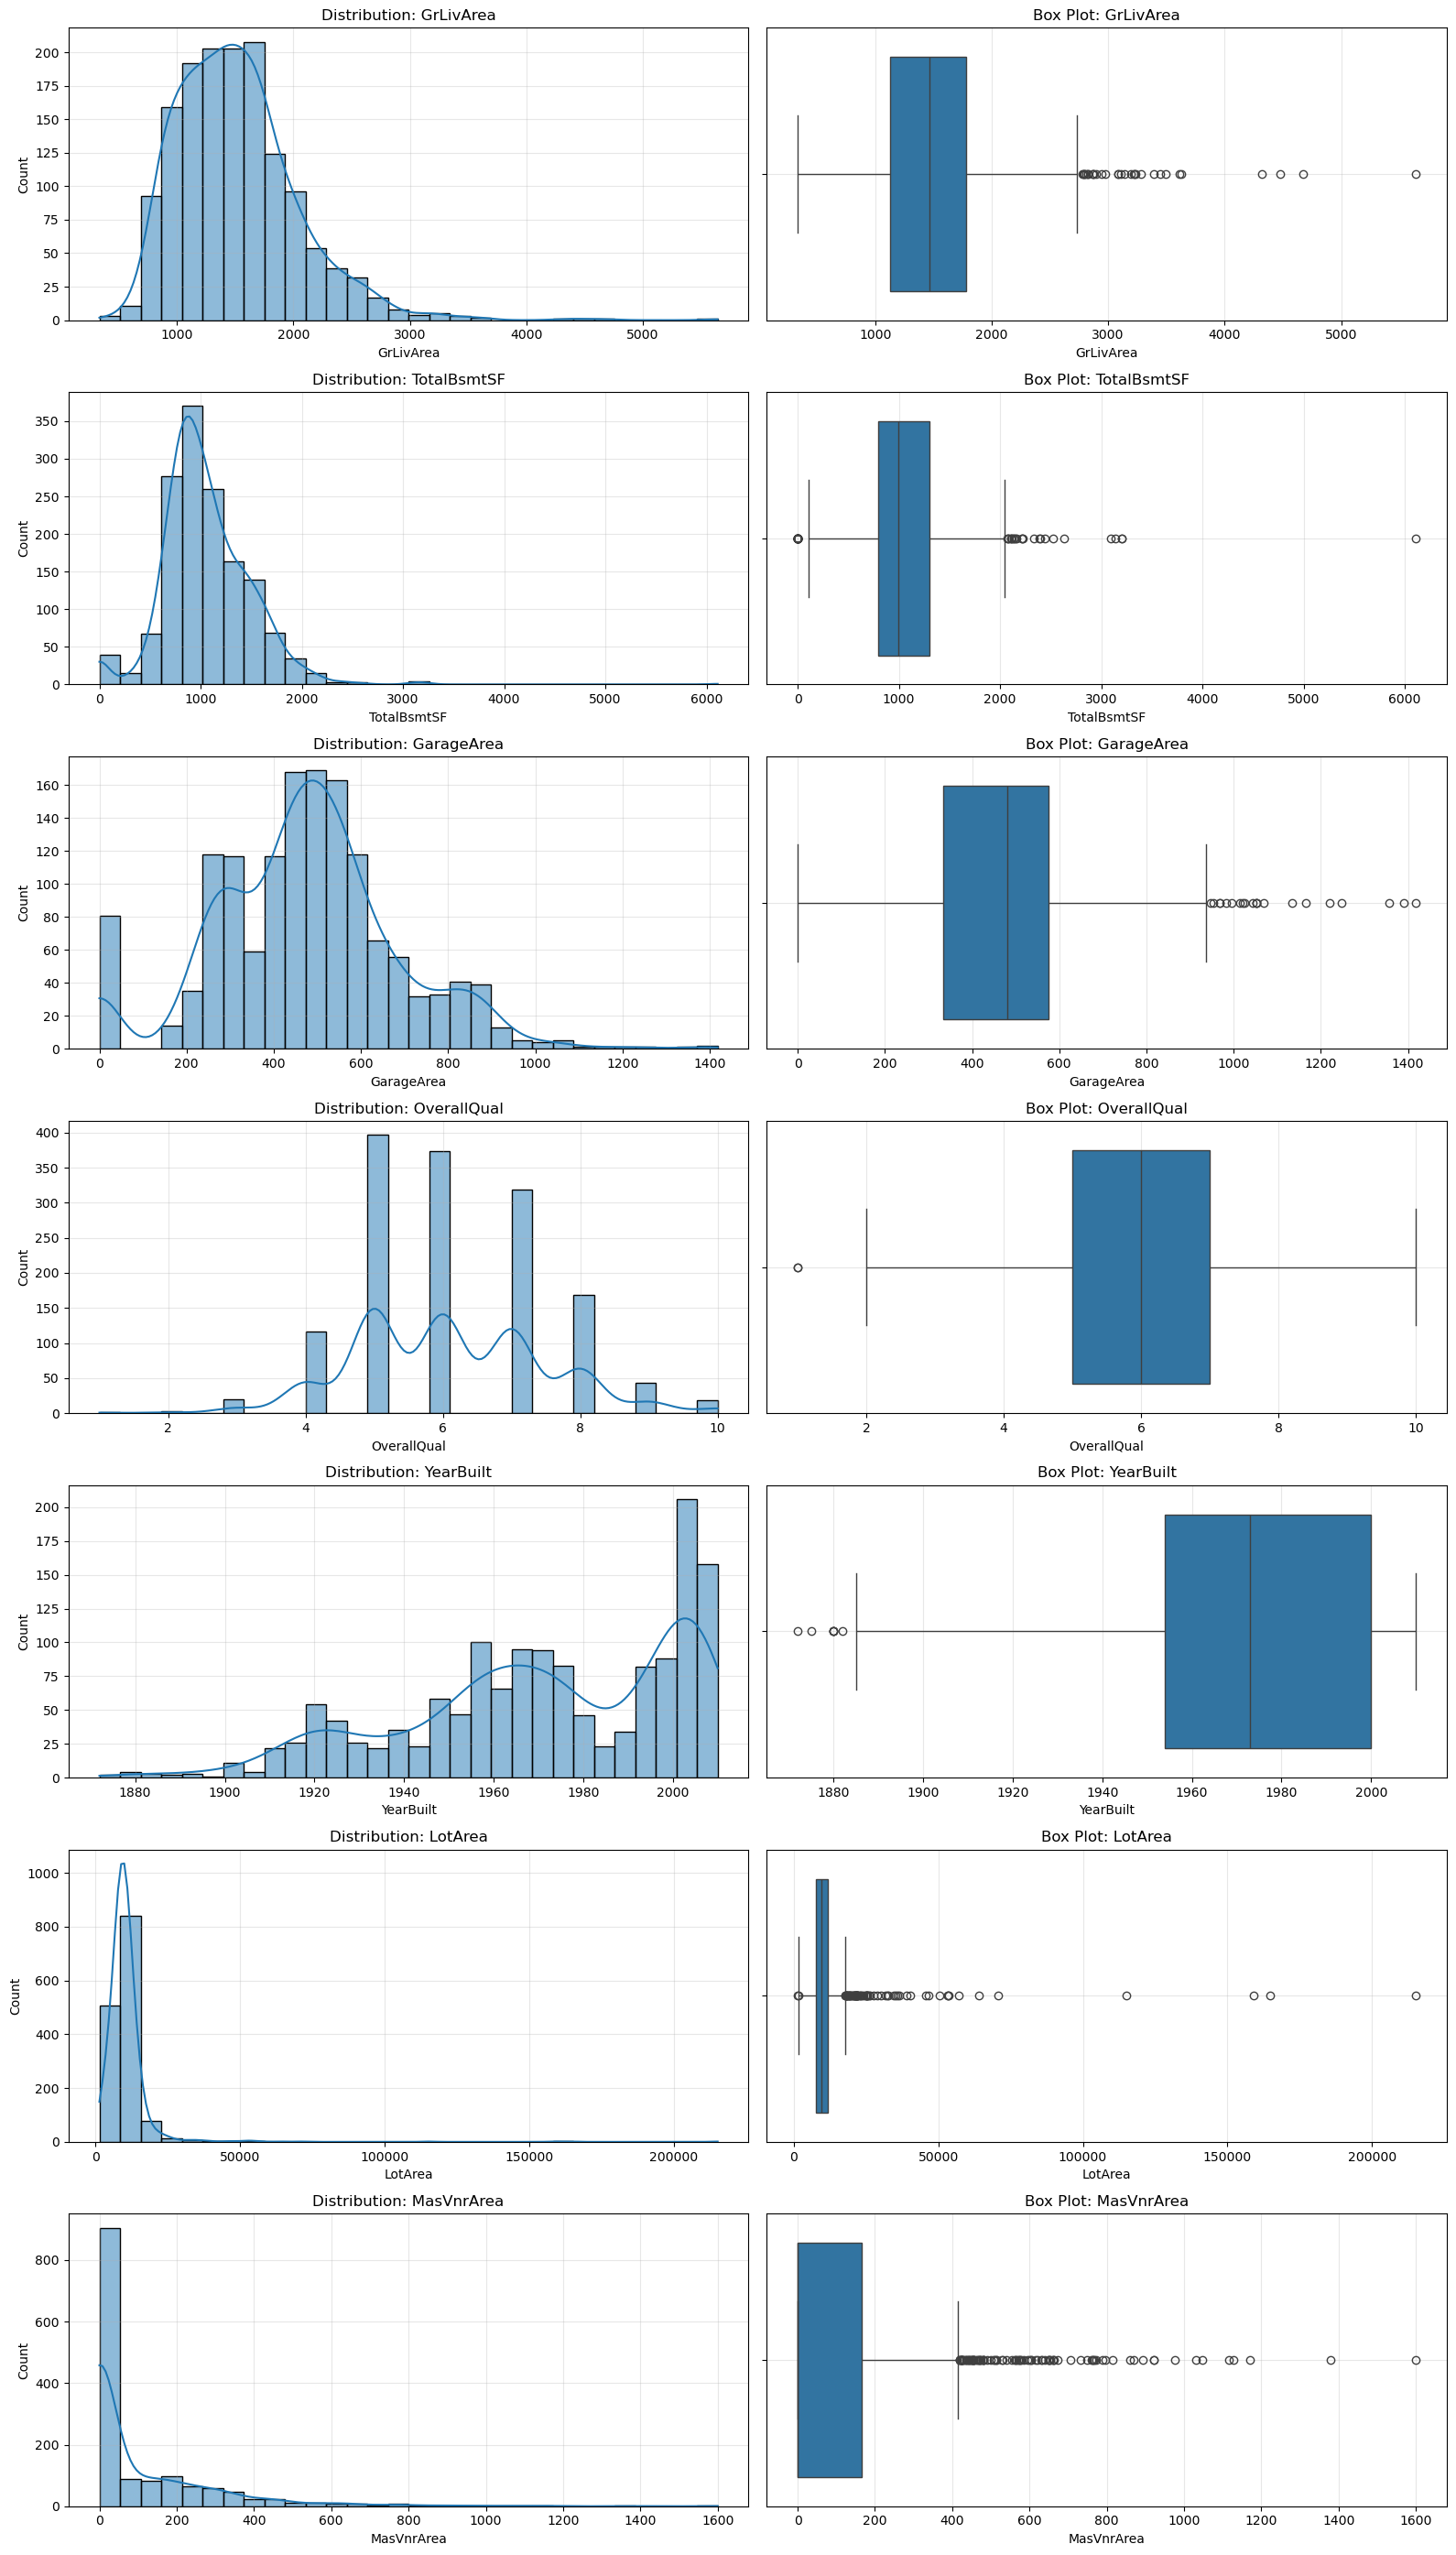

In [ ]:
# by using histogram, boxplot to analyze the distribution of numerical features
# based on the results
# all the diagram is dwed to the left
# there are many outliers which means there may have many missing
cols_to_plot = ["GrLivArea", "TotalBsmtSF", "GarageArea", "OverallQual", "YearBuilt",'LotArea','MasVnrArea']

n = len(cols_to_plot)
fig, axes = plt.subplots(n, 2, figsize=(16, 4*n))

for idx, col in enumerate(cols_to_plot):
    s = df[col].dropna()

    # 1) Histogram
    sns.histplot(s, bins=30, kde=True, ax=axes[idx, 0])
    axes[idx, 0].set_title(f"Distribution: {col}")
    axes[idx, 0].grid(True, alpha=0.3)

    # 2) Boxplot
    sns.boxplot(x=s, ax=axes[idx, 1])
    axes[idx, 1].set_title(f"Box Plot: {col}")
    axes[idx, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Why I Selected These 7 Numerical Features:**

I selected a focused set of numerical and ordinal features — 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'OverallQual', 'YearBuilt', 'LotArea', 'MasVnrArea' — out of the 37 available numerical variables based on the following criteria:

1. **Domain Knowledge & Intuitive Importance**: These features are known to be highly influential in real estate pricing based on industry knowledge and represent core aspects of a property's value proposition.

2. **Coverage of Different Property Dimensions**: Each feature captures a distinct aspect of the house:
   - **Size metrics**: GrLivArea (living space), TotalBsmtSF (basement), GarageArea (parking), LotArea (land)
   - **Quality indicator**: OverallQual (construction quality rating)
   - **Age/condition proxy**: YearBuilt (property age)
   - **Premium features**: MasVnrArea (exterior finishing quality)

3. **Expected High Correlation with SalePrice**: Based on real estate market logic, these features are likely to have stronger relationships with price compared to more granular features (e.g., WoodDeckSF, ScreenPorch).

4. **Avoiding Redundancy**: Instead of analyzing all area-related features (1stFlrSF, 2ndFlrSF, GrLivArea), I focused on the most comprehensive ones (GrLivArea = total above-ground living area) to avoid multicollinearity issues.

5. **Representative Sample for EDA**: Analyzing all 37 features would be inefficient and redundant. These 7 provide sufficient insight into typical distribution patterns (skewness, outliers) that apply to other similar features.

**Why This Step is Important:**

By visualizing the distribution of these numerical features through histograms and boxplots, I can:

- **Detect Skewness**: Right-skewed distributions (common in real estate data) may require log transformation or other normalization techniques to improve model performance, especially for linear models that assume normality.

- **Identify Outliers**: Determine whether extreme values are:
  - **Legitimate luxury properties** (should be retained as they represent real market segments)
  - **Data entry errors** (should be corrected or removed)
  - **Influential observations** that may disproportionately affect model training

- **Assess Data Spread & Variability**: Features with very low variance (e.g., most values are identical) contribute little predictive power and may be candidates for removal.

- **Guide Feature Engineering Decisions**: Understanding distributions helps decide:
  - Whether to apply transformations (log, square root, Box-Cox)
  - Whether to create binned/categorical versions of continuous variables
  - Whether extreme values need capping or winsorization

- **Provide Context for Relationship Analysis**: Knowing that a feature is heavily skewed helps interpret its correlation with SalePrice more accurately. For example, a weak correlation might strengthen after log transformation.

- **Prepare for Assumption Checking**: Many machine learning algorithms (especially linear regression) perform better when features follow certain distributional properties. This step lays the foundation for meeting those assumptions.

This exploratory analysis ensures that subsequent data cleaning, feature engineering, and modeling decisions are grounded in actual data behavior rather than assumptions.

---

I selected a small set of numerical and ordinal features that are intuitively important in real estate and represent different aspects of a house: "GrLivArea", "TotalBsmtSF", "GarageArea", "OverallQual", "YearBuilt",'LotArea','MasVnrArea'.
By doing this step, I gain a clear understand of the distributional characteristics of each featue, including skewness, outliers and overall spread. This is essential for making informed data cleaning decison, wuch as whether outliers should be retained as meaningful observations or treated as noise. on and skewness and ouliers which i will have to decide whether I need to remain or remove it in data cleaning. Also, it provides the necessary background information for subsequent realtionship analysis, therebu ensuring that the observed correlations with the target variable can be interpreted in a statistically and practically meaningful manner.

1. **GrLivArea**
    - Above-ground living area is one of the most direct indicators of usable space for a household as usually in real world, a larger activity area usually enhances the market value of a house, which reflects higher construction costs (materials, labor) and provides better comfort and functionality.
    - The distribution shows right-skewed pattern, with many high outliers. This indicates that there is a significant variation in the size of houses in the dataset. Most of the observations are concentrated within the medium-sized range of houses, which are typical family residences. In contrast, the longer upper tail reflects the existence of a few extremely large houses.
    - The diagram may represent luxury or particularly large-sized residences purchased by high-income buyers, while most of the observations focus on medium-sized family homes, which aligns with the "mass market with small luxury market" pattern.

2. **TotalBsmtSF**
    - Basement size captures additional floor space that can increase storage capacity, functional rooms (e.g., recreation room), and overall property utility. It will increase the house price as some residences will like to have a basement to expand the house's functional area for greater versatility and long-term usage potential, which may influence buyer preferences and sale prices. 
    - The right-skewed with many upper outliers may show that Most houses have relatively moderate basement areas while a smaller number possess exceptionally large basements. The upper outliers may be driven by differences in house design, construction practices, and nrighborhood norms.  
    - These may indicates that the developers prefer to create small or medium-sized basement areas due to practical and economic constraints rather than homeowner preference alone. Constructing larger basements require deeper earthwork, stronger foundation and structural support, which substantially increases construction costs. Therefore, very large basement are uncommon and typically appear only in high-end or custom built properties. Also, for most families, the cost-effectiveness is not high because it would require a higher price.

3. **GarageArea**
    - Garage area offers both convenient parking and additional storage space, which are highly sought-after features in many real estate markets. A larger garage can accommodate more vehicles or provide more working space, which can enhance people's perception of the quality and value of the property. While most households require only standard parking space, larger garages allow accommodation of multiple vehicles or additional functional uses, which enhances property attractiveness by improving convenience, security and oveall usability but the price will also be increasing due to more space areas and construction price.
    - The right-skewed with many upper outliers shows thatmost cluster around standard garage sizes, which reflects typical family homes with 1 to 2 car garages. The upper tail consists of a small number of properties with unusually large garages, which may correspond to luxury homes or properties owned by higehr-income households who owns more cars.
    - The uneven and fluctuating shape observed in some histograms does not indicate the data quality issues. Instead, it help to exaplain that several realistic factors, such as living area or garage size are discrete integer values rather than continuous measurements.

4. **LotArea**
    - Land size of property is an important component of real estate value, as larger plots offer more outdoor space, greater privacy, greater potential for future expansion, and higher overall appeal.
    - Strongly right-skewed with upper outliers shows that not a lot of people will like to buy a large LotArea, which may because LotArea usally in low-density areas of new development areas or on the urban fringes, which may be more unconvenitent to travel daily.
    - It indicates that the dataset contains a mixture of densely populated urban plots with smaller areas and properties in the suburbs/rural areas or at the urban fringes with larger areas. This change has made "plot area" a key indicator, which can effectively reflect "regional density and land premium differences".

5. **MasVnrArea**
    - MasVnrArea measures the area of masonry venerr, such as the exterior decoration of bricks or stones, can serve as representatives of high-quality exterior building materials and decorations. Such areas usually indicate that the building has a higher grade or a more outstanding appearance which will increase the prices as it usually requires higher quality construction or reovation.
    - Strong right-skewed with a lot of upper outliers shows that most houses have little or no masonry veneer, while only small subset of properties have sustantial exterior brick or stone finished. One possible reason is that modern construction techniques have significantly enhanced building safety, making homeowners less concerned about the practical benefits of features like masonry veneer. The buyers may also do not really concern about structural risks (e.g., heavy rain) due to improved safety standards, reducing the perceived value of additional wall protection like masonry veneer.
    - This is consistent with the characteristics of luxurious or upgraded properties. Therefore, this feature helps to identify the signals of high-end decoration, which may be associated with higher sales prices.

6. **YearBuilt**
    - The year when a house was built can indicate the era it belongs to, and this is usually related to factors such as building standards, renovation needs, energy efficiency, and modern layout preferences. Newer houses usually have a higher value because they have lower maintenance costs and may use newer materials/designs; while older houses may have a lower price unless they have historical value or require extensive renovations.Also, housing prices are influenced by technological and reguulatory changes in construction over time.
    - Lightly bimodal pattern of left-skewed with few outliers shows that most people prefer to buy new houses. This may indicate that the newer houses are often developed in areas with better surrounding infrastructure and amenities, suchh as shopping mall or schools. Alternatively, buyers may choose newer but less centrally located houses in the same srounf price of older houses due to more attractive designs or modern layouts, even if the transportation is inconvenient. Also, it may also show that significant proportion of buyers in the market have sufficient purchasing power to afford newer homes, which are typically priced higehr than older properties.

7. **OverallQual**
    - Two houses with similar size and layout may have significant price differences due to variations in materials, decoration, and overall construction standards. The OverallQual can more effectively reflect these differences and is more capable of predicting the selling price of the property than individual component features. Therefore, OverallQual is more effective in capturing these differences than the individual component-level feature, smaking it one of the strongest predictors of SalePrice in real estate valuation.
    - The distribution is slightly right-skewed, as higher quality ratings (8–10) occur less frequently but are still present, representing a smaller segment of higher-end homes. Very low quality ratings (1–3) are rare, suggesting that extremely poor-condition houses are uncommon in the observed sales data.
    - It is assumed that OverallQual is applied consistently across all properties, such that higher ratings reflect genuinely better construction and finishing quality. The concentration of values around 5–7 represents the dominant housing stock in Ames rather than data bias. Due to its bounded ordinal scale, the limited number of outliers is expected, making OverallQual a stable and reliable predictor of housing prices.

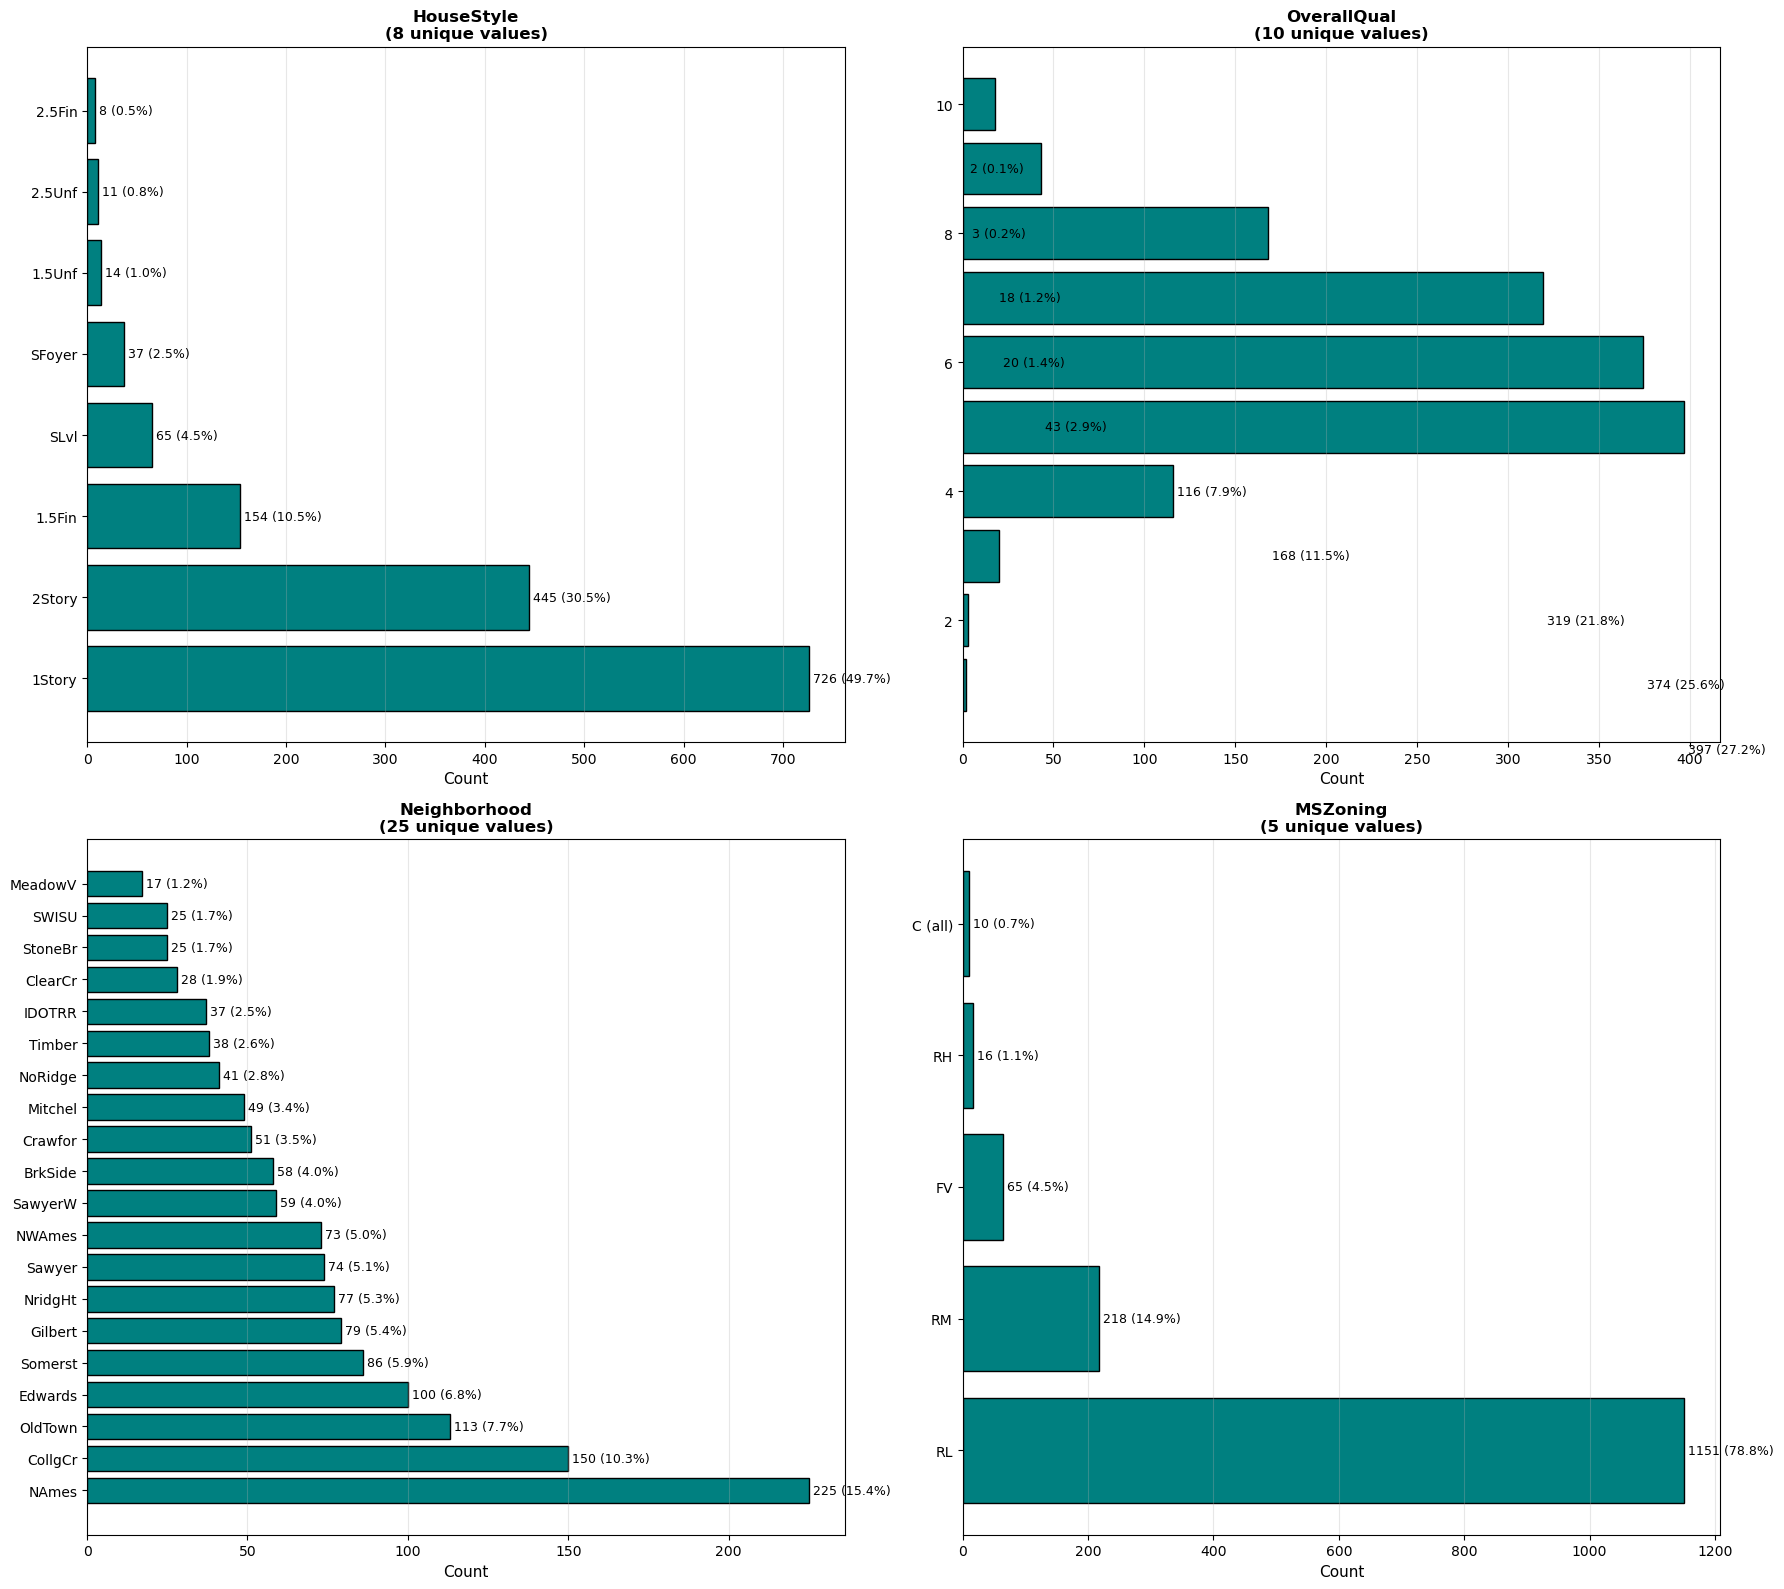

In [ ]:
key_categoricals = ['HouseStyle', 'OverallQual', 'Neighborhood', 'MSZoning']
fig, axes = plt.subplots(2, 2, figsize=(18, 16))
axes = axes.ravel()

for idx, feature in enumerate(key_categoricals[:4]):
    value_counts = df[feature].value_counts().head(20)
    axes[idx].barh(value_counts.index, value_counts.values, color='teal', edgecolor='black')
    axes[idx].set_xlabel('Count', fontsize=11)
    axes[idx].set_title(f'{feature}\n({df[feature].nunique()} unique values)', 
                        fontsize=12, fontweight='bold')
    axes[idx].grid(alpha=0.3, axis='x')
    
    # Add percentage labels
    for i, v in enumerate(value_counts.values):
        axes[idx].text(v, i, f' {v} ({v/len(df)*100:.1f}%)', 
                      va='center', fontsize=9)

plt.tight_layout()
plt.show()

**Why I Selected These 4 Categorical Features:**

I selected a focused set of categorical features — 'HouseStyle', 'OverallQual', 'Neighborhood', 'MSZoning' — out of the 43 available categorical variables based on the following criteria:

1. **Domain Knowledge & Business Relevance**: These features are intuitively important in real estate valuation and capture different dimensions of a property (structural type, quality rating, location, zoning regulation).

2. **Expected Predictive Power**: Based on real estate market understanding, these features likely have strong relationships with SalePrice compared to less critical features like 'Street' (only 2 values) or 'Utilities' (almost all identical).

3. **Representation of Different Aspects**: Each feature represents a distinct category — style (HouseStyle), quality (OverallQual), geography (Neighborhood), legal classification (MSZoning) — avoiding redundancy.

4. **Manageable Cardinality**: While features like Neighborhood have multiple categories, they remain interpretable and won't create excessive dummy variables compared to features with too many unique values.

**Why This Step is Important:**

By visualizing the distribution of these categorical features, I can:

- **Assess Class Balance**: Determine whether categories are balanced or heavily imbalanced. Imbalanced features (e.g., if one neighborhood dominates 80% of data) may cause overfitting when using one-hot encoding, as the model may overfit to the dominant category.

- **Guide Encoding Strategy**: Decide between one-hot encoding (for balanced, low-cardinality features) vs. frequency/target encoding (for high-cardinality or imbalanced features) to prevent the curse of dimensionality.

- **Identify Meaningful Missing Values**: Some "NA" or "None" values may represent real categories (e.g., "No Garage") rather than true missing data, which requires different handling strategies.

- **Detect Rare Categories**: Categories with very few observations may need to be combined into an "Other" group or handled separately to avoid creating unstable predictions.

- **Prepare for Feature Selection**: Understanding which categories are common vs. rare helps prioritize which categorical features should be retained, transformed, or dropped in the data preparation phase.

This exploratory step ensures that subsequent preprocessing decisions are data-driven and statistically sound, rather than arbitrary.

---

I selected a small set of nCategorical features that are intuitively important in real estate and represent different aspects of a house: 'HouseStyle', 'OverallQual', 'Neighborhood', 'MSZoning'. By performing this step, I understand whether the features are balance or imbalance which may cause overfitting or underfitting after doing the one-hot encoding. This helps me to decide whether I want to drop, combine the categorical by using frequency encoding. Also, there are some "NA", "None" values which may cause...Check ordinal or nominal is good... there are so many variables which will be overfitting by using the one- hot encoding. Therefore I have to decide what to use frequency/target encoding. Moreover, the presence of values such as "NA" or "none" has been identified, and their interpretation as representing real missing data or meaningful missing values has been considered in the context of this issue, thereby guiding appropriate preprocessing strategies. 

1. **HouseStyle**
    - HouseStyle refelcts a structural layout and number of floors of a house, which directly affects construction cost, land usage and living convenience. Different buyers naturally have different preference of houses style. Usually, larger or taller houses will cost more, as they require more complex structural designs and longer construction time.In many cases, the construction of houses is tailored to the needs of specific user groups. For instance, older homebuyers usually prefer 1Story houses without stairs, as it avoids the inconvenience of climbing stairs; while large families may opt for multi-story houses to separate the living area from the sleeping area. 
    - However, the diagram shows that most people prefer 1Story, which indicates taht the majority of buyers prefer simple and practical layouts. This might suggest that most buyers in Ames have a moderate bufegt and place more empahsis on practically rather than the size of the houses. Morever, features, such as garage and basements allow homeowners to expand the usable space without increasing the number of floors, reducing the demand for higher or complax house design.
    - Next will be Split Level houses, which indicates that a portion of home buyers value personalized layouts and flexible space utilization methods. In contrast, higher and larger house types, such as 2.5Story houses, occur much less frequently. This implies that very large or very tall houses may have lower cost-effectiveness due to higher maintenance costs and more complex management complexities. Thus, there are less attractive to most home buyers. Such houses are more likely to be purchased by wealthier home buyers, as they can afford the higher purchase price and the long-term maintenance costs.

2. **OverallQual**
    - Rates the overall material and finish of the house which may relate to factors such as Building material grades, construction techniques and overall completion rate. This will affect the saleprice as it requires greater construction costs, stricter safety standards and need to hire more advanced construction techniques.Therefroe, mmore buyers will prefer a safer and more durable houses. As a result, properties with high exterior quality ratings tend to command higher sale prices.
    - However, the diagram above shows that most of buyers choose Average/Typical (5-6), followed by Good (6-8), indicating that the majority of properties in the dataset have moderate to good exterior quality rather than exceptional quality. This distribution is realistic in a real world housing market where houses with extremely poor exterior are uncommon as they are often renovated, rebuilt or removed from market to meet minimum legal and safety standards. ALso, it may because that buyers are more focused on interiror layour, finished and living comfort rather than exterior appearance alone. Alternatively, after purchasing a property, homeowners often realize that interior-related issues, such as inconvenient layouts, poor bathroom flooring or low-quality interior finishes, have a much greater impact on daily living experience. 

3. **Neighborhood**
    - The most common communities, such as Namas, Colgri District and the Old Town, are mature and stable residential areas in Ames City, featuring complete infrastructure, excellent transportation convenience, and housing types that meet the mainstream market demands. These areas strike a balance between affordability and quality of life, resulting in a high transaction volume and a larger proportion in the data set. Their prevalence reflects supply-side factors, such as a larger housing stock, as well as the demand-side preference for stable, convenient and family-friendly communities. The reason for choosing "Neighborhood" as a distribution feature is that it can reveal the composition of the data in different residential areas, thereby helping to determine whether the data is mainly driven by the mainstream market or the niche market.

4. **MSZoning**
    - "MSZoning" was selected as a distribution feature because it describes land use regulations and types of residential planning, which help to depict the overall structure of the housing market represented in the dataset, rather than directly explaining housing prices. It is assumed that "MSZoning" mainly reflects urban planning restrictions rather than directly serving as a pricing factor, and the more frequent zoning categories represent the mainstream residential market rather than niche or luxury market segments. Based on this assumption, buyers typically prefer low-density living environments because such environments offer better living conditions, higher privacy, and greater long-term investment value. The chart shows a highly uneven distribution, with "RL" (low-density residential) accounting for approximately 78.8% of the observations, indicating that the dataset is mainly composed of low-density, family-oriented housing. This reflects the urban structure of Ames City, the abundant supply of such properties, and the continuous demand of typical homebuyers. In contrast, other zoning categories such as RM, FV, RH, and C have much lower frequencies, which are consistent with the restrictions on land allocation and the exclusivity of specific purposes. Overall, this distribution pattern confirms that the dataset mainly represents the mainstream residential market, providing important background information for analyzing the relationship between the features and the target variable.

### 2.3.2 Understanding relationship between variables

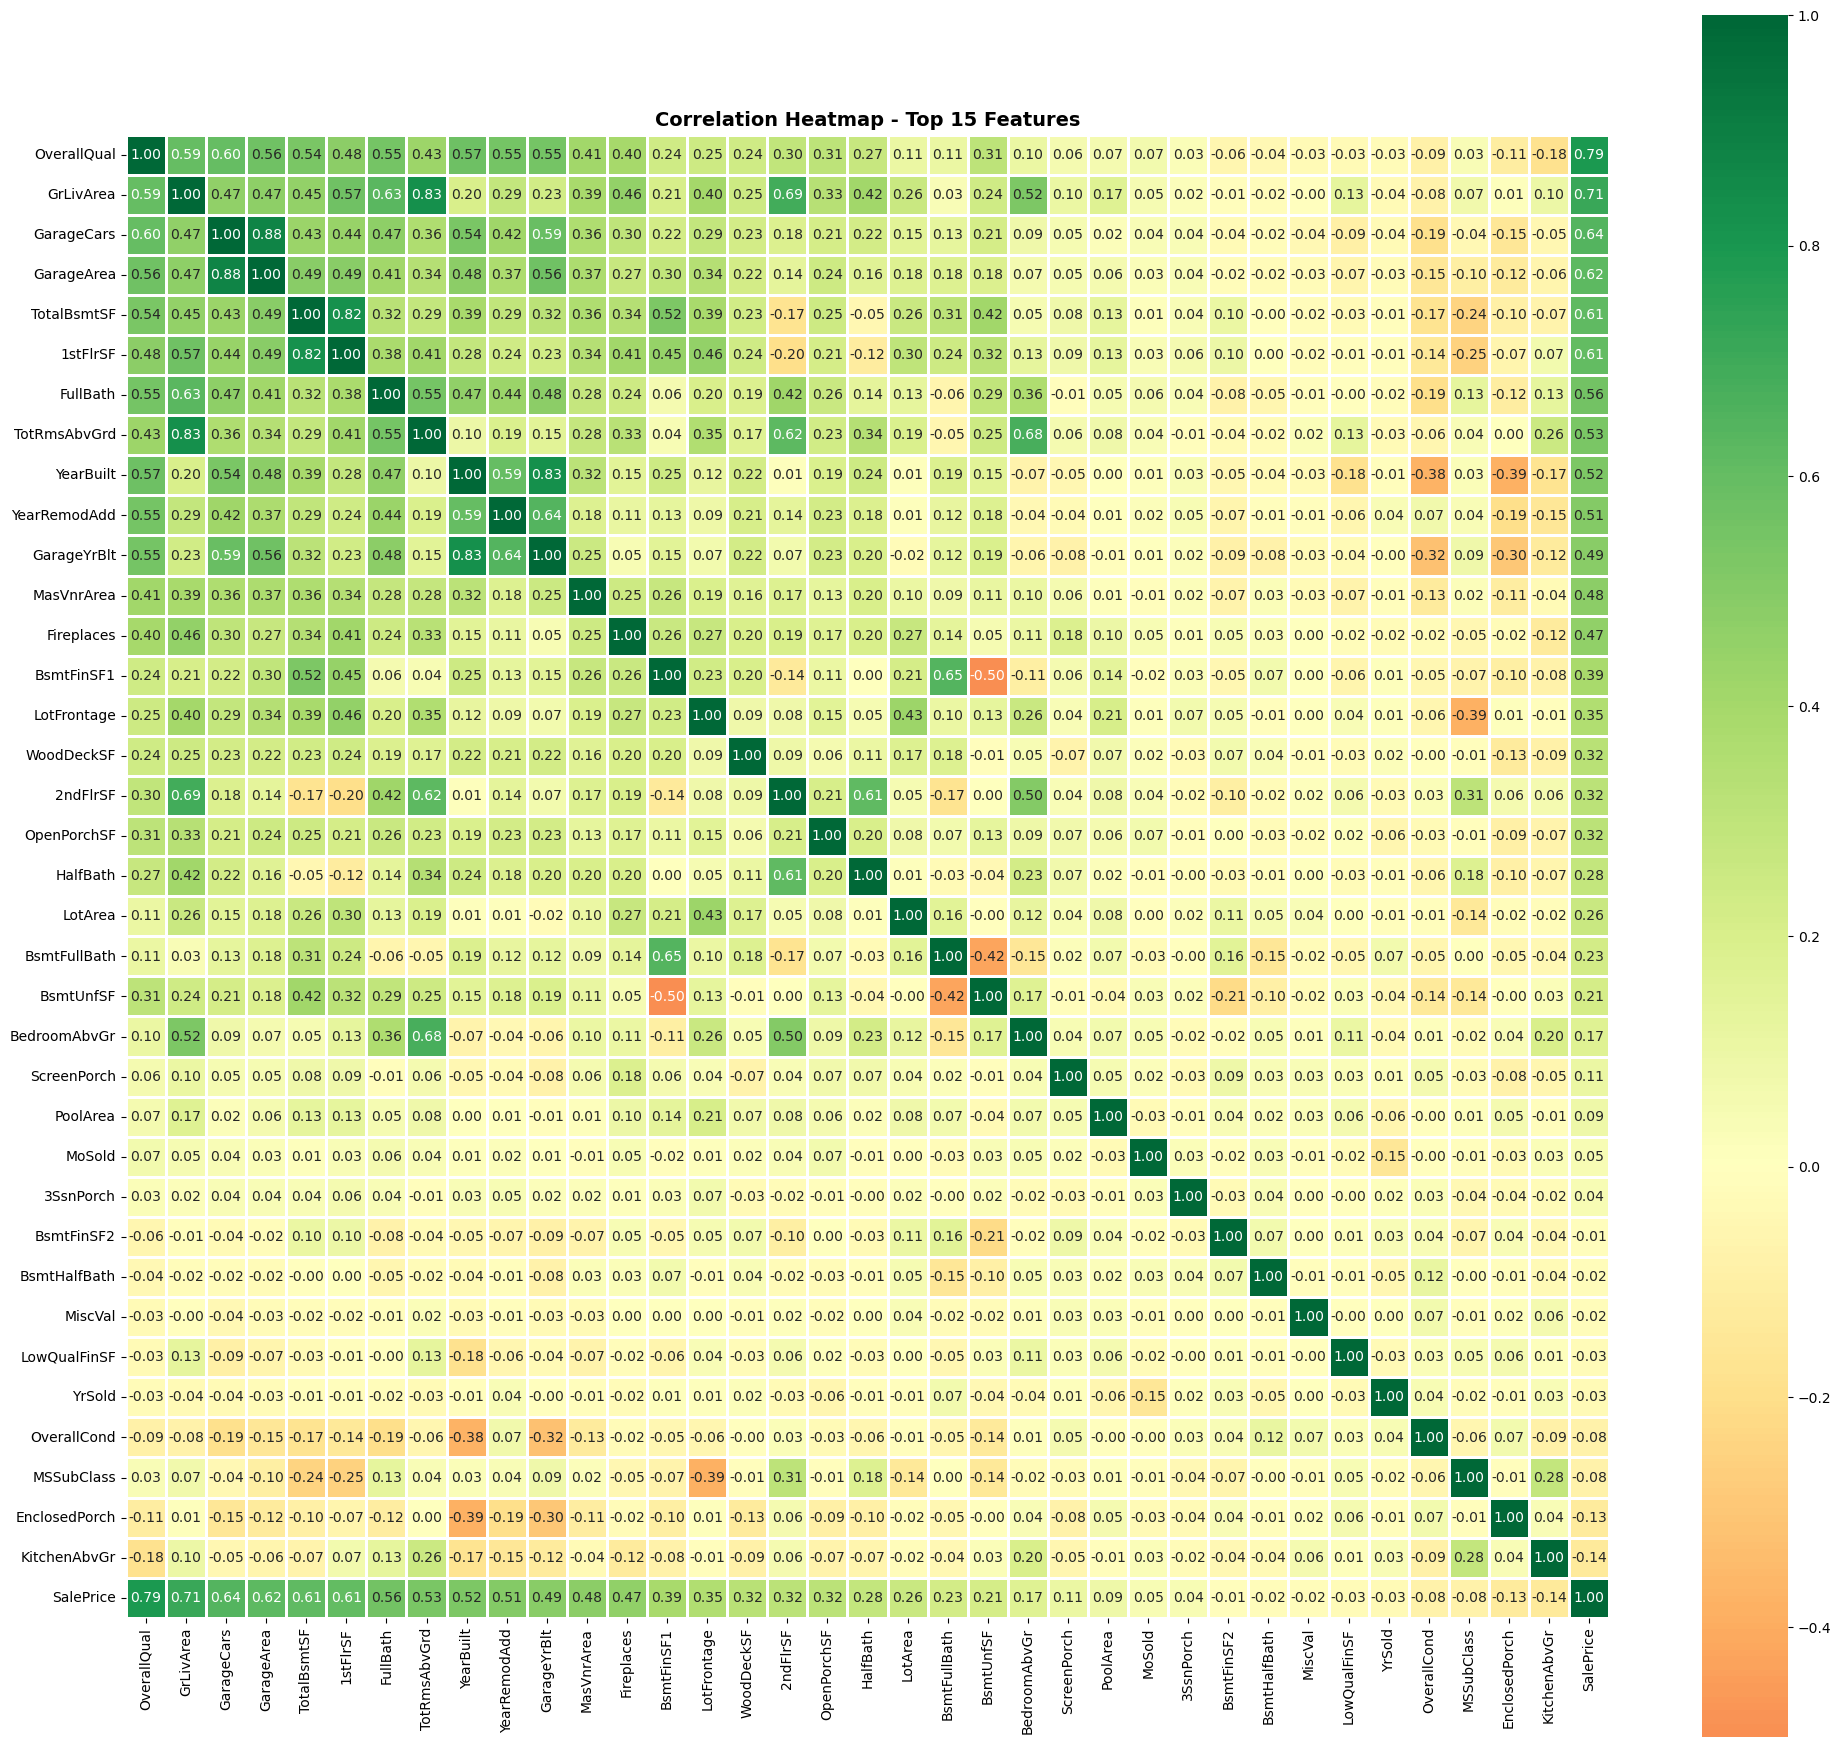

In [ ]:
top_features = correlations[1:].index.tolist() + ['SalePrice']
corr_matrix = df[top_features].corr()

plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn', center=0, square=True, linewidths=1)
plt.title('Correlation Heatmap - Top 15 Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**What the Correlation Heatmap Tells Us:**

The correlation heatmap is a powerful visualization that displays the **strength and direction of linear relationships** between all pairs of numerical features, including the target variable (SalePrice). Each cell shows the correlation coefficient ranging from -1 to +1:

- **Strong Positive Correlation (0.7 to 1.0, Green)**: Features move together in the same direction. Example: GrLivArea and SalePrice (larger houses → higher prices).
- **Weak/No Correlation (around 0, Yellow)**: Features have little to no linear relationship.
- **Strong Negative Correlation (-1.0 to -0.7, Red)**: Features move in opposite directions (rare in this dataset).

---

**Key Benefits of This Analysis:**

1. **Identify Top Predictors**: Features with high correlation to SalePrice (e.g., OverallQual ≈ 0.79, GrLivArea ≈ 0.71) are strong candidates for the model, as they have strong linear relationships with the target.

2. **Detect Multicollinearity**: When two features are highly correlated with each other (e.g., GarageCars and GarageArea ≈ 0.88), they provide redundant information. Including both may:
   - Inflate model coefficients (for linear regression)
   - Cause numerical instability
   - Make feature importance unclear
   - **Solution**: Keep only one of the correlated features or use dimensionality reduction (PCA).

3. **Avoid Feature Redundancy**: If TotalBsmtSF and 1stFlrSF are highly correlated, using both doesn't add much predictive value. Dropping one simplifies the model without losing information.

4. **Understand Feature Relationships**: Seeing how features relate to each other helps in feature engineering. For example:
   - If GarageCars and GarageArea are highly correlated, we might create a combined feature or drop one.
   - If YearBuilt and YearRemodAdd are moderately correlated, we might create a "years since renovation" feature.

5. **Guide Model Selection**: 
   - Linear models (Linear Regression, Ridge, Lasso) are sensitive to multicollinearity → need to remove highly correlated features.
   - Tree-based models (Random Forest, XGBoost) are less affected but still benefit from reduced feature redundancy → faster training, less overfitting.

6. **Validate Domain Knowledge**: The heatmap confirms our real estate intuition:
   - Quality metrics (OverallQual, ExterQual) strongly correlate with price ✓
   - Size metrics (GrLivArea, TotalBsmtSF) strongly correlate with price ✓
   - Garage features correlate with each other (GarageCars ↔ GarageArea) ✓

7. **Guide Missing Value Treatment Strategy**: The correlation information is extremely valuable for deciding how to handle missing values:
   
   **a) Smart Imputation Strategy:**
   - If a feature with missing values (e.g., GarageArea) is **highly correlated** with another complete feature (e.g., GarageCars ≈ 0.88), I can use **predictive imputation** (linear regression, KNN) to estimate missing values based on the correlated feature rather than simply using mean/median.
   - Example: If GarageArea is missing but GarageCars = 2, I can predict GarageArea based on their strong correlation.
   
   **b) Prioritize Which Features to Keep/Drop:**
   - If a feature has **many missing values AND low correlation with SalePrice** (e.g., < 0.2), it's a strong candidate for **deletion** as the effort to impute may not be worth the minimal predictive gain.
   - Conversely, if a feature with missing values has **high correlation with SalePrice** (e.g., > 0.5), it's worth investing effort in sophisticated imputation methods to retain this valuable predictor.
   
   **c) Understand Missing Value Patterns:**
   - If features that logically should correlate (e.g., GarageType, GarageCars, GarageArea) all have missing values for the same observations, this suggests **structured missingness** (e.g., "No Garage") rather than random data loss.
   - In such cases, missing values should be treated as **meaningful category** (e.g., fill with "None" or 0) rather than imputed with statistical methods.
   
   **d) Choose Between Imputation vs. Indicator Variables:**
   - For features with **moderate correlation** to the target and moderate missingness, I might create both:
     - Imputed version of the feature (using correlated features)
     - Binary "is_missing" indicator variable (to capture if missingness itself is informative)
   
   **Example Decision Process:**
   - **LotFrontage** (missing ~17%): If correlated with LotArea (0.65), use regression imputation based on LotArea.
   - **MasVnrArea** (missing ~0.5%): Small missingness + moderate correlation (0.48) → simple mean imputation or drop few rows.
   - **Alley** (missing ~93%): Even if correlated with other features, massive missingness + likely low importance → consider dropping entire feature or treat as "No Alley" category.

8. **Inspire Feature Engineering Opportunities**: The correlation patterns reveal valuable insights for creating new, more powerful features:
   
   **a) Combine Highly Correlated Features:**
   - If GarageCars (0.64 with SalePrice) and GarageArea (0.62 with SalePrice) are highly correlated with each other (0.88), instead of dropping one, I could create:
     - **GarageScore** = normalized(GarageCars) + normalized(GarageArea) → captures both dimensions
     - **CarSpacePerArea** = GarageCars / GarageArea → garage space efficiency metric
   
   **b) Create Interaction Features:**
   - If OverallQual and GrLivArea both strongly correlate with SalePrice but have moderate correlation with each other, their **interaction term** (OverallQual × GrLivArea) might capture "quality-adjusted living space" that explains price variation better than either feature alone.
   - Example: A large house (high GrLivArea) with excellent quality (high OverallQual) commands a premium beyond just the sum of individual effects.
   
   **c) Engineer Ratio/Derived Features:**
   - **TotalSF** = GrLivArea + TotalBsmtSF (combining related area metrics into comprehensive size indicator)
   - **LivingAreaRatio** = GrLivArea / TotalSF (proportion of above-ground vs. total space)
   - **HouseAge** = CurrentYear - YearBuilt (more interpretable than raw year)
   - **YearsSinceRemodel** = CurrentYear - YearRemodAdd (captures renovation recency)
   
   **d) Create Polynomial Features for Strong Linear Relationships:**
   - If OverallQual shows very strong linear correlation (0.79), creating OverallQual² might capture non-linear "premium" effects where excellent quality commands exponentially higher prices.
   - However, be cautious of multicollinearity when adding polynomial terms.
   
   **e) Identify Domain-Specific Composite Scores:**
   - **QualityIndex** = weighted average of OverallQual, ExterQual, KitchenQual (if all correlate similarly)
   - **PropertySizeScore** = weighted sum of GrLivArea, TotalBsmtSF, GarageArea, LotArea
   - These reduce dimensionality while capturing comprehensive concepts.
   
   **f) Detect Non-Linear Relationships:**
   - If a feature has weak linear correlation but strong domain logic (e.g., YearBuilt), the heatmap suggests trying transformations:
     - Log transformation for skewed features
     - Binning continuous features into categories (age groups, size tiers)
     - May reveal stronger relationships after transformation
   
   **Example Engineering Decisions Based on Heatmap:**
   - **Observed**: GarageCars (0.64) and GarageArea (0.62) highly correlated → **Action**: Create GarageScore composite
   - **Observed**: OverallQual (0.79) and GrLivArea (0.71) both strong but independent → **Action**: Create interaction term OverallQual × GrLivArea
   - **Observed**: YearBuilt and YearRemodAdd moderately correlated → **Action**: Create "PropertyAge" and "YearsSinceRemodel" features
   - **Observed**: TotalBsmtSF and 1stFlrSF highly correlated → **Action**: Instead of dropping, create "BasementToFloorRatio" = TotalBsmtSF / 1stFlrSF

---

**What This Heatmap Tells Me Specifically:**

From the visualization, I can identify:

- **Features to Prioritize**: OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF (all have correlations > 0.6 with SalePrice).

- **Potential Multicollinearity Issues**: 
  - GarageCars ↔ GarageArea (high correlation → consider keeping only one)
  - TotalBsmtSF ↔ 1stFlrSF (if highly correlated → may need to drop one)
  - YearBuilt ↔ GarageYrBlt (construction year features tend to correlate)

- **Weak Predictors**: Features with correlation < 0.3 with SalePrice may contribute little value and could be dropped to simplify the model.

- **Feature Engineering Opportunities**: 
  - Highly correlated feature pairs can be combined (e.g., create "Total Living Area" = GrLivArea + TotalBsmtSF).
  - Correlated time features can be engineered into "Age" or "Years Since Renovation" metrics.

---

**Why This Step Is Critical Before Modeling:**

- **Improves Model Performance**: Removing redundant features reduces overfitting and speeds up training.
- **Enhances Interpretability**: Models with fewer, more meaningful features are easier to explain to stakeholders.
- **Prevents Numerical Issues**: Highly correlated features can cause instability in coefficient estimation for linear models.
- **Informs Feature Selection**: Provides data-driven evidence for which features to keep, transform, or remove.
- **Optimizes Data Cleaning Strategy**: Helps prioritize which missing values need sophisticated imputation vs. simple filling vs. deletion.

This heatmap transforms raw correlation numbers into an intuitive visual format, making it easier to spot patterns and make informed preprocessing decisions.

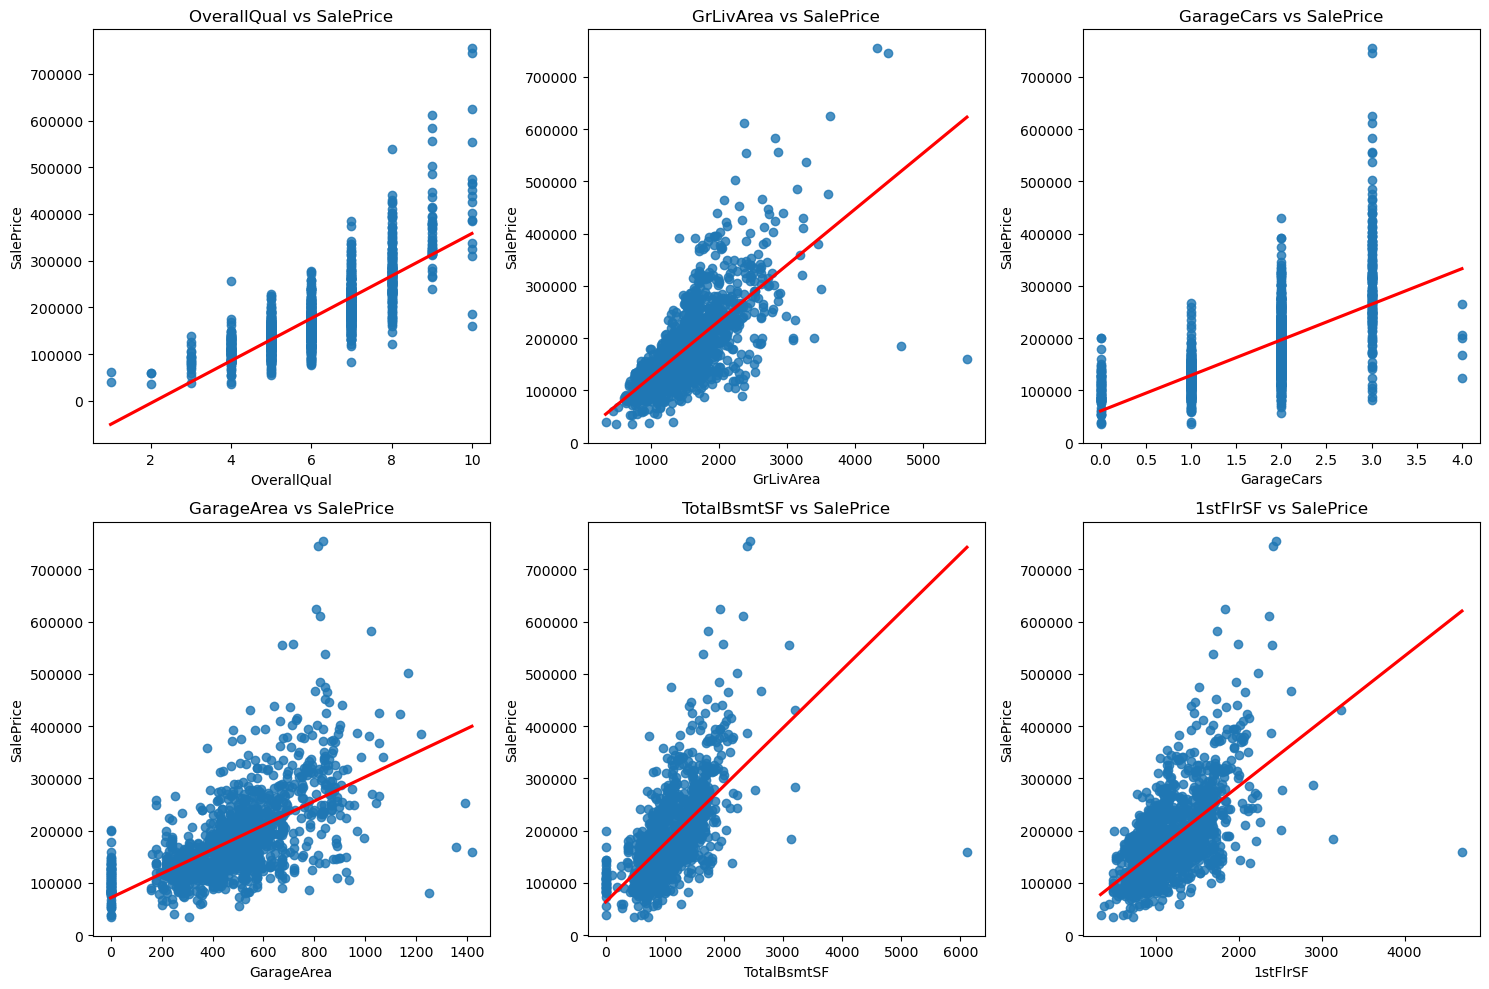

In [ ]:
top5_features = correlations.drop('SalePrice').head(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(top5_features):
    sns.regplot(
        x=feature,
        y='SalePrice',
        data=df,
        ax=axes[i],
        ci=None,
        line_kws={'color':'red'}
    )
    axes[i].set_title(f'{feature} vs SalePrice')
    
plt.tight_layout()
plt.show()


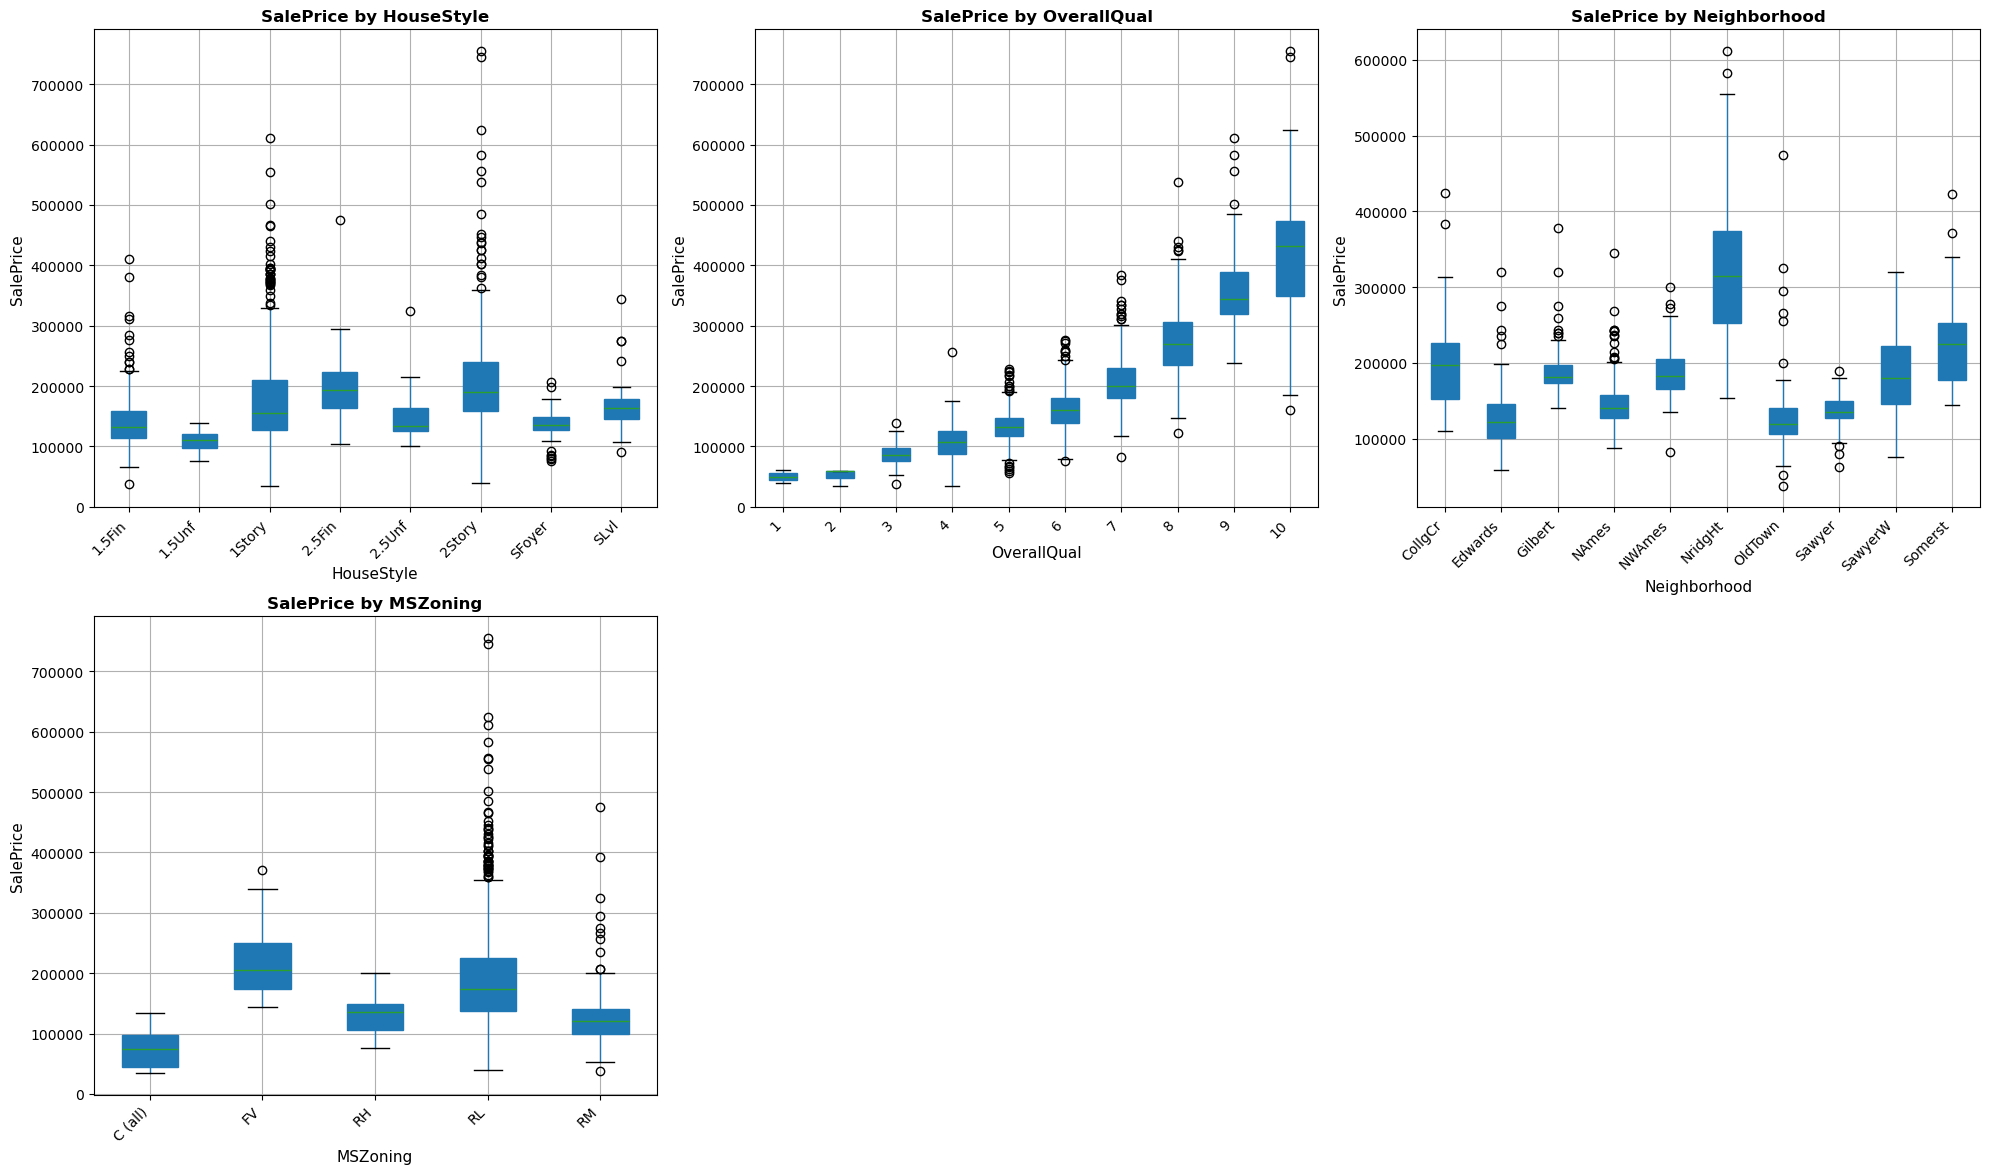

In [ ]:
if target_col in df.columns and len(key_categoricals) > 0:
    # Analyze top categorical features
    num_cat_to_analyze = min(6, len(key_categoricals))
    
    if num_cat_to_analyze > 0:
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        axes = axes.flatten()
        
        for idx, cat_col in enumerate(key_categoricals[:num_cat_to_analyze]):
            # Box plot
            df_plot = df[[cat_col, target_col]].dropna()
            
            # Limit categories if too many
            top_categories = df_plot[cat_col].value_counts().head(10).index
            df_plot_filtered = df_plot[df_plot[cat_col].isin(top_categories)]
            
            df_plot_filtered.boxplot(column=target_col, by=cat_col, ax=axes[idx], 
                                     patch_artist=True, grid=True)
            axes[idx].set_xlabel(cat_col, fontsize=11)
            axes[idx].set_ylabel(target_col, fontsize=11)
            axes[idx].set_title(f'{target_col} by {cat_col}', fontsize=12, fontweight='bold')
            axes[idx].tick_params(axis='x', rotation=45)
            plt.sca(axes[idx])
            plt.xticks(rotation=45, ha='right')
            
            # Remove automatic title from pandas boxplot
            axes[idx].get_figure().suptitle('')
        
        # Hide unused subplots
        for idx in range(num_cat_to_analyze, 6):
            axes[idx].set_visible(False)
        
        plt.tight_layout()
        plt.show()

# 3. Data Preparation

## 3.1 Data Cleaning

In [ ]:
## Clean data

## 3.2 Train-Test Split

In [ ]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [ ]:
## Initialise and train model


# 5. Model Evaluation

In [ ]:
## Evaluate model


In [ ]:
## New data

## Predict


## Iterative model development


In [ ]:
## Further feature engineering / feature selection